# Data Science Project - Churn Data

## Bibliotecas Necessárias

In [1]:
# Bibliotecas de análise de dados
import pandas as pd
import numpy as np
import missingno as missing

# Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import PredictionError
from mlxtend.plotting import plot_decision_regions 

# Biblioteca do modelo de ML - MODELO
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Biblioteca para Combinação de modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# Biblioteca de validação - VALIDAÇÃO
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split

# Biblioteca de Exportação 
import joblib


from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## Importação e Preparação dos Dados

In [2]:
# fonte: https://kaggle.comshrutimechlearn/churn-modelling
url = 'https://raw.githubusercontent.com/wanderson-blima/project_ml_churn_data/master/Dados/Churn_Modelling.csv'
dados = pd.read_csv(url)
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Análise prévia dos dados

In [3]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())
    print('\n', '-' * 50)
    print('INFORMAÇÕES QUANTITATIVAS')
    print(data.describe())


show_info(dados)

DATASET SHAPE:  (10000, 14) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory u

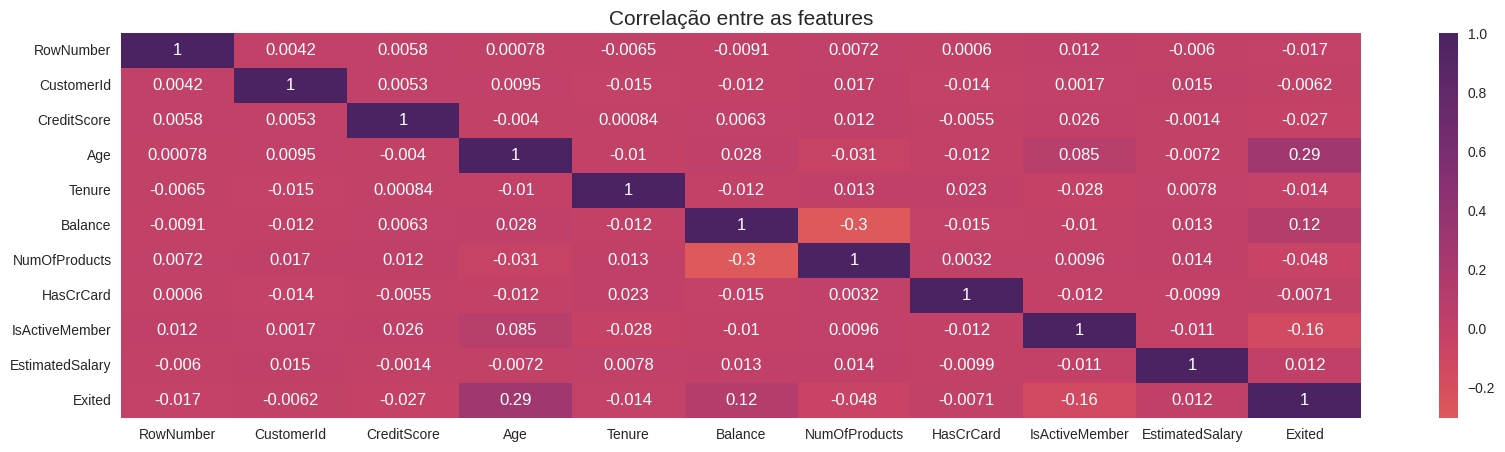

In [4]:
# Análise de correlação entre as features: 
plt.figure(figsize=(20,5))
plt.title('Correlação entre as features', size=15)
sns.heatmap(dados.corr(), cmap='flare', center=0, annot=True)
plt.show()

### Pré-processamento para Machine Learning

In [5]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


1. Remover variáveis não importantes

In [6]:
# Removendo de variáveis que não importantes para a criação do modelo
dados.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)


In [7]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. Verificar dados faltantes

In [8]:
# verificar dados nulos
dados.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

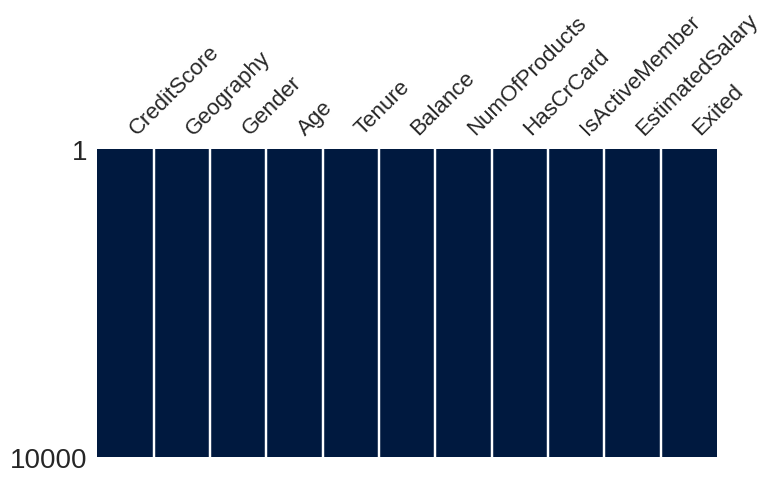

In [9]:
# Análisando valores nulos de forma gráfica
missing.matrix(dados, figsize = (8, 4), color = (0, 0.1, 0.25), sparkline = False);

3. Categorização de variáveis continuas

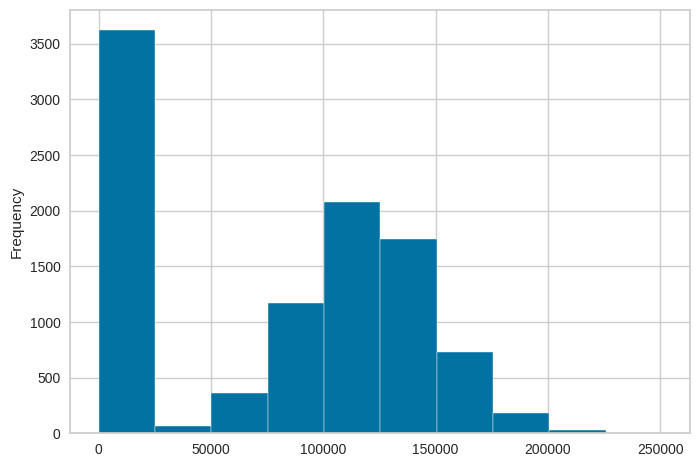

In [10]:
# Categorizando a variável 'Balance'
dados['Balance'].plot(kind = 'hist', edgecolor = 'white'); # plotando o histograma para análisar a distribuição dos dados

In [11]:
# análisando informações estatisticas sem os valores 0
dados[dados['Balance'] > 0]['Balance'].describe()

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

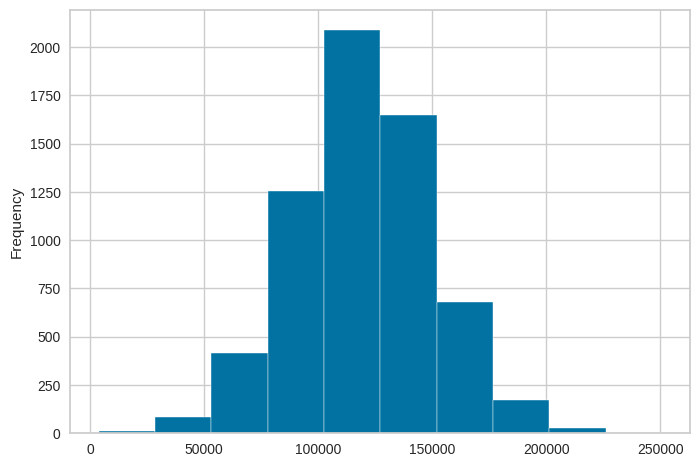

In [12]:
# plotando o histograma para análisar a distribuição dos dados sem os valores 0
dados[dados['Balance'] > 0]['Balance'].plot(kind = 'hist', edgecolor = 'white');

In [13]:
# Criando um função auxiliar para Categorizar a variável 'Balance'
def auxiliar(x):
    if x == 0:
        return 'Zerada'
    elif x < 100000:
        return 'Até 100k'
    elif x < 120000:
        return '100k - 120k'
    elif x < 140000:
        return '120k - 140k'
    else:
        return '140k+'

dados['Balance'] = dados['Balance'].apply(auxiliar)
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,Zerada,1,1,1,101348.88,1
1,608,Spain,Female,41,1,Até 100k,1,0,1,112542.58,0
2,502,France,Female,42,8,140k+,3,1,0,113931.57,1
3,699,France,Female,39,1,Zerada,2,0,0,93826.63,0
4,850,Spain,Female,43,2,120k - 140k,1,1,1,79084.10,0


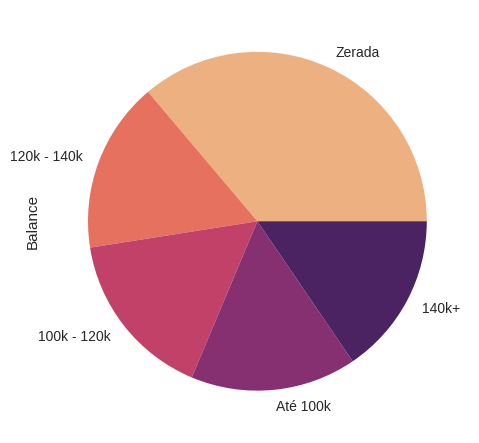

In [14]:
dados['Balance'].value_counts().plot(kind = 'pie', colormap = 'flare');

4. Agrupamento de categorias

In [15]:
# realizando agrupamento na variável 'Tenure'
dados['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [16]:
# Criando um função auxiliar para agrupar em categorias a variável 'Tenure'
def auxiliar(x):
    if x == 0:
        return '0-'
    elif x <= 3:
        return '1-3'
    elif x <= 6:
        return '4-6'
    elif x <= 9:
        return '7-9'
    else:
        return '10-'

dados['Tenure'] = dados['Tenure'].apply(auxiliar)

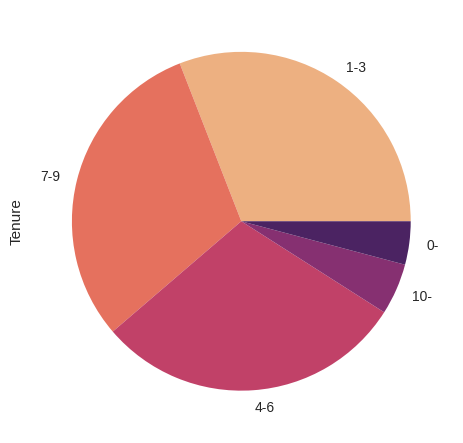

In [17]:
dados['Tenure'].value_counts().plot(kind = 'pie', colormap = 'flare');

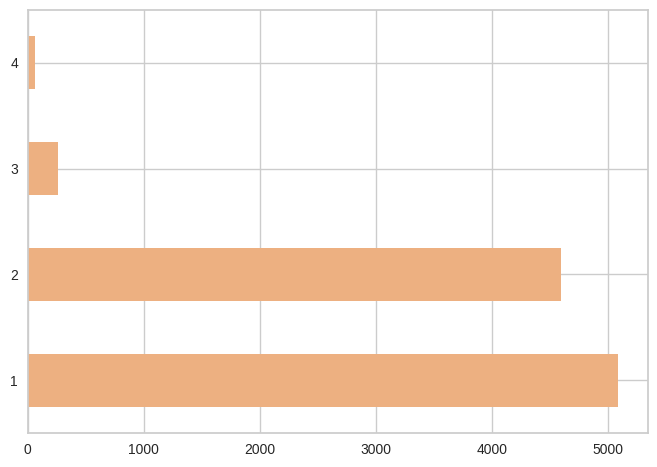

In [18]:
# realizando agrupamento na variável 'NumOfProducts'
dados['NumOfProducts'].value_counts().plot(kind = 'barh', colormap = 'flare');

In [19]:
# Criando um função auxiliar para agrupar em categorias a variável 'Tenure'
def auxiliar(x):
    if x == 1:
        return 'NumProd1'
    else:
        return 'NumProd2+'

dados['NumOfProducts'] = dados['NumOfProducts'].apply(auxiliar)

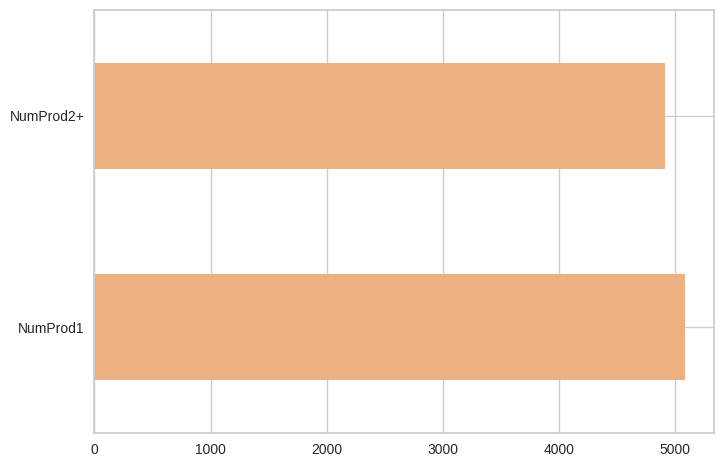

In [20]:
dados['NumOfProducts'].value_counts().plot(kind = 'barh', colormap = 'flare');

5. Dummyficação de variáveis

In [21]:
dados.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,1-3,Zerada,NumProd1,1,1,101348.88,1
1,608,Spain,Female,41,1-3,Até 100k,NumProd1,0,1,112542.58,0
2,502,France,Female,42,7-9,140k+,NumProd2+,1,0,113931.57,1
3,699,France,Female,39,1-3,Zerada,NumProd2+,0,0,93826.63,0
4,850,Spain,Female,43,1-3,120k - 140k,NumProd1,1,1,79084.10,0


In [22]:
# Transformando as variaveis categoricas em colunas númericas
pd.get_dummies(dados['Geography'], drop_first = True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [23]:
# Armazenando apenas as colunas categoricas em uma lista para realizar as dummificações:
tipos_categoricos = ['object']
variaveis_categoricas = list(dados.select_dtypes(include = tipos_categoricos).columns)
variaveis_categoricas

['Geography', 'Gender', 'Tenure', 'Balance', 'NumOfProducts']

In [24]:
# Realizando a dummificação:
dados = pd.get_dummies(dados, columns = variaveis_categoricas, drop_first = True)

In [25]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,619,42,1,1,101348.88,1,0,0,0,1,0,0,0,0,0,0,1,0
1,608,41,0,1,112542.58,0,0,1,0,1,0,0,0,0,0,1,0,0
2,502,42,1,0,113931.57,1,0,0,0,0,0,0,1,0,1,0,0,1
3,699,39,0,0,93826.63,0,0,0,0,1,0,0,0,0,0,0,1,1
4,850,43,1,1,79084.10,0,0,1,0,1,0,0,0,1,0,0,0,0


6. Ajuste na escala das variáveis contínuas

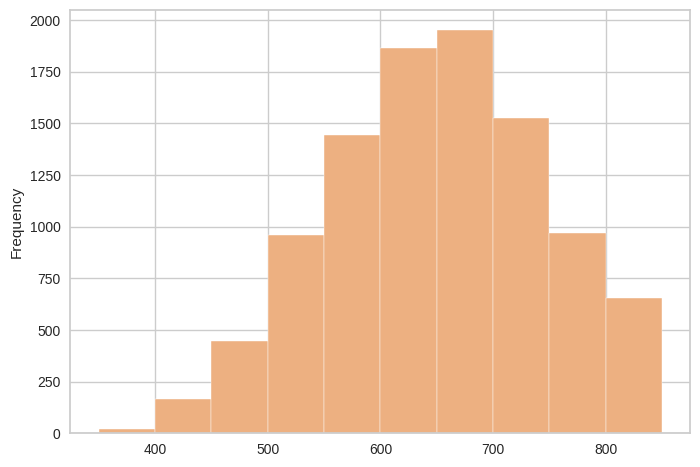

In [26]:
# Distribuição da variável 'CreditScore'
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

In [27]:
# Para manter a interpretabilidade do score de credito, será realizado uma mudança de escala dividindo o valor por 1000:
dados['CreditScore'] = dados['CreditScore']/1000

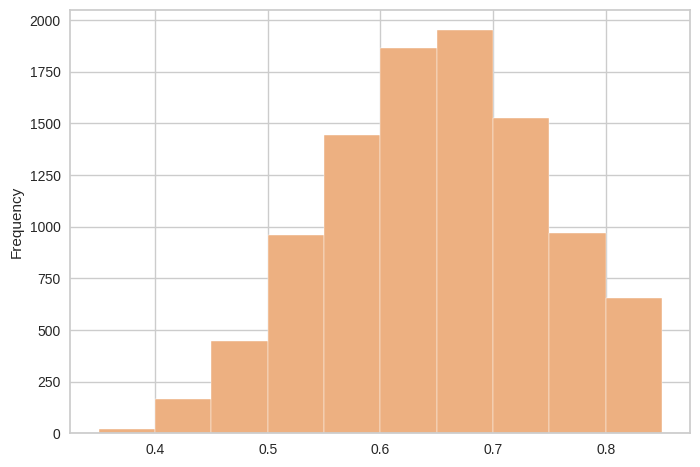

In [28]:
# Distribuição da variável 'CreditScore' ajustada
dados['CreditScore'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

- Padronização

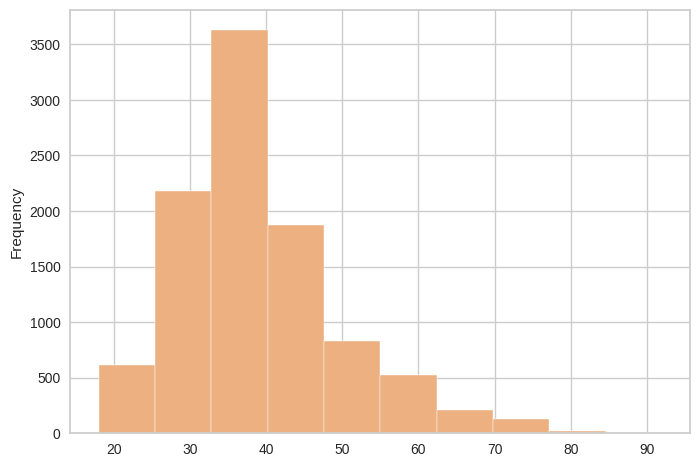

In [29]:
# Distribuição da variável 'Age'
dados['Age'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

In [30]:
# Realizando a Padronizaçãona variável 'Age': 
media = np.mean(dados['Age'])
desvio = np.std(dados['Age'])

dados['Age'] = (dados['Age'] - media)/desvio

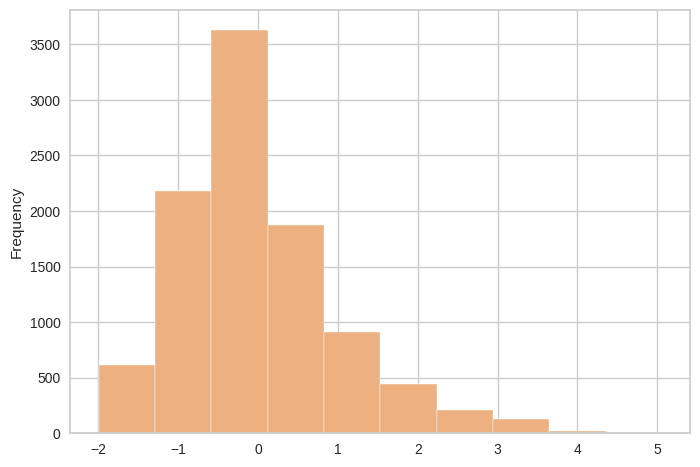

In [31]:
# Distribuição da variável 'Age' ajustada
dados['Age'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

In [32]:
dados['Age'].describe().round(2)

count    10000.00
mean         0.00
std          1.00
min         -1.99
25%         -0.66
50%         -0.18
75%          0.48
max          5.06
Name: Age, dtype: float64

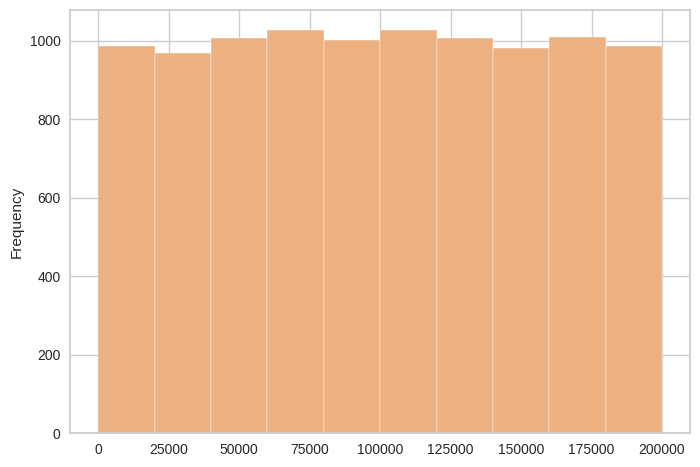

In [33]:
# Distribuição da variável 'EstimatedSalary'
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

In [34]:
dados['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [35]:
# Realizando a padronização, dividindo o valor dos dados por um valor próximo ao valor máximo da distribuição:
dados['EstimatedSalary'] = dados['EstimatedSalary']/200000

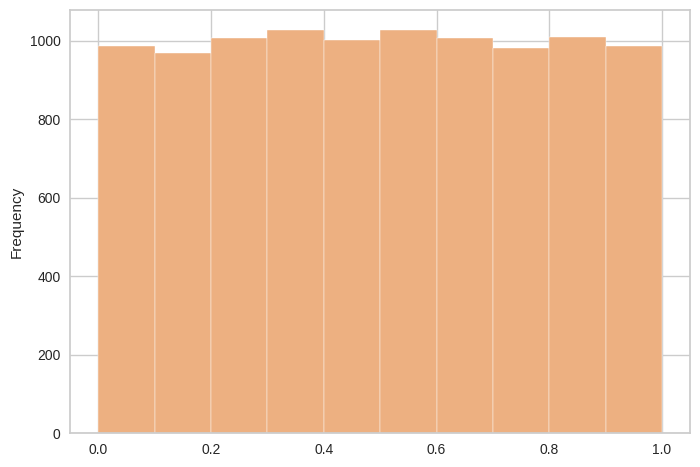

In [36]:
# Distribuição da variável 'EstimatedSalary'
dados['EstimatedSalary'].plot(kind = 'hist', edgecolor = 'white', colormap = 'flare');

In [37]:
dados.head()

,CreditScore,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Tenure_1-3,Tenure_10-,Tenure_4-6,Tenure_7-9,Balance_120k - 140k,Balance_140k+,Balance_Até 100k,Balance_Zerada,NumOfProducts_NumProd2+
0,0.619,0.293517,1,1,0.506744,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0.608,0.198164,0,1,0.562713,0,0,1,0,1,0,0,0,0,0,1,0,0
2,0.502,0.293517,1,0,0.569658,1,0,0,0,0,0,0,1,0,1,0,0,1
3,0.699,0.007457,0,0,0.469133,0,0,0,0,1,0,0,0,0,0,0,1,1
4,0.850,0.388871,1,1,0.395421,0,0,1,0,1,0,0,0,1,0,0,0,0


## Machine Learning

In [38]:
# Variavel de validação
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 2)

In [39]:
# Criando os modelos de Machine Learning
x = dados.drop('Exited', axis = 1)
y = dados['Exited']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                    DecisionTreeClassifier(max_depth = 3),
                    DecisionTreeClassifier(max_depth = 5),
                    DecisionTreeClassifier(max_depth = 7),
                    KNeighborsClassifier(n_neighbors = 5),
                    KNeighborsClassifier(n_neighbors = 15),
                    KNeighborsClassifier(n_neighbors = 25),
                    KNeighborsClassifier(n_neighbors = 35),
                    BaggingClassifier(),
                    RandomForestClassifier(n_estimators = 50, max_depth = 5),
                    RandomForestClassifier(n_estimators = 50, max_depth = 7),
                    RandomForestClassifier(n_estimators = 100, max_depth = 5),
                    RandomForestClassifier(n_estimators = 100, max_depth = 7)]

nome_dos_modelos = ['Regressão Logistica',
                    'Árvore (prof = 3)',
                    'Árvore (prof = 5)',
                    'Árvore (prof = 7)',
                    '5-NN',
                    '15-NN',
                    '25-NN',
                    '35-NN',
                    'Bagging',
                    'Random Forest (arvs = 50, prof = 5)',
                    'Random Forest (arvs = 50, prof = 7)',
                    'Random Forest (arvs = 100, prof = 5)',
                    'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

for i in range(len(lista_de_modelos)):

    print('Rodando Modelo: ' + nome_dos_modelos[i])

    accs_vs = cross_validate(lista_de_modelos[i], x, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vs['test_accuracy'].mean()
    sen = accs_vs['test_recall'].mean()
    vpp = accs_vs['test_precision'].mean()
    bac = accs_vs['test_balanced_accuracy'].mean()
    f1s = accs_vs['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]

resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


Rodando Modelo: Regressão Logistica
Rodando Modelo: Árvore (prof = 3)
Rodando Modelo: Árvore (prof = 5)
Rodando Modelo: Árvore (prof = 7)
Rodando Modelo: 5-NN
Rodando Modelo: 15-NN
Rodando Modelo: 25-NN
Rodando Modelo: 35-NN
Rodando Modelo: Bagging
Rodando Modelo: Random Forest (arvs = 50, prof = 5)
Rodando Modelo: Random Forest (arvs = 50, prof = 7)
Rodando Modelo: Random Forest (arvs = 100, prof = 5)
Rodando Modelo: Random Forest (arvs = 100, prof = 7)


In [40]:
# Visualizando os resultados
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Árvore (prof = 7),0.83385,0.373072,0.666266,0.662393,0.476758
5-NN,0.82405,0.386091,0.609696,0.661086,0.471833
15-NN,0.83460,0.334578,0.695481,0.648545,0.450801
Bagging,0.82180,0.350992,0.608637,0.646613,0.444774
25-NN,0.83780,0.319353,0.734660,0.644889,0.444512
Árvore (prof = 5),0.83475,0.325210,0.714237,0.645149,0.443172
"Random Forest (arvs = 100, prof = 7)",0.84110,0.310760,0.775580,0.643764,0.442990
"Random Forest (arvs = 50, prof = 7)",0.84025,0.307090,0.773185,0.641866,0.438963
35-NN,0.83740,0.297747,0.757025,0.636598,0.426779
Regressão Logistica,0.81705,0.258714,0.622616,0.609296,0.365030


## Escolha do modelo

In [41]:
# modelo vencedor foi a Árvore DecisionTreeClassifier(max_depth = 7)
# com o f1-score de 48%

x = dados.drop('Exited', axis = 1)
y = dados['Exited']

Xtreino, Xteste, ytreino, yteste  = train_test_split(x, y, test_size = 0.25)
lista_de_modelos[3].fit(Xtreino, ytreino)

DecisionTreeClassifier(max_depth=7)

In [42]:
# modelo vencedor foi a Árvore DecisionTreeClassifier(max_depth = 7)
# com o f1-score de 48%
joblib.dump( lista_de_modelos[3], 'arvore_prof_7_v1.pkl')


['arvore_prof_7_v1.pkl']

In [43]:
lista_de_modelos[3].feature_importances_

array([0.03456563, 0.5240645 , 0.00768605, 0.14950109, 0.0580078 ,
       0.05826014, 0.00474584, 0.00807941, 0.        , 0.00200597,
       0.00457549, 0.00911358, 0.        , 0.01124443, 0.02186983,
       0.04468626, 0.06159397])

In [44]:
variaveis = pd.DataFrame()
variaveis['variavel'] = x.columns
variaveis['importancia'] = lista_de_modelos[3].feature_importances_
variaveis

,variavel,importancia
0,CreditScore,0.034566
1,Age,0.524064
2,HasCrCard,0.007686
3,IsActiveMember,0.149501
4,EstimatedSalary,0.058008
5,Geography_Germany,0.058260
6,Geography_Spain,0.004746
7,Gender_Male,0.008079
8,Tenure_1-3,0.000000
9,Tenure_10-,0.002006


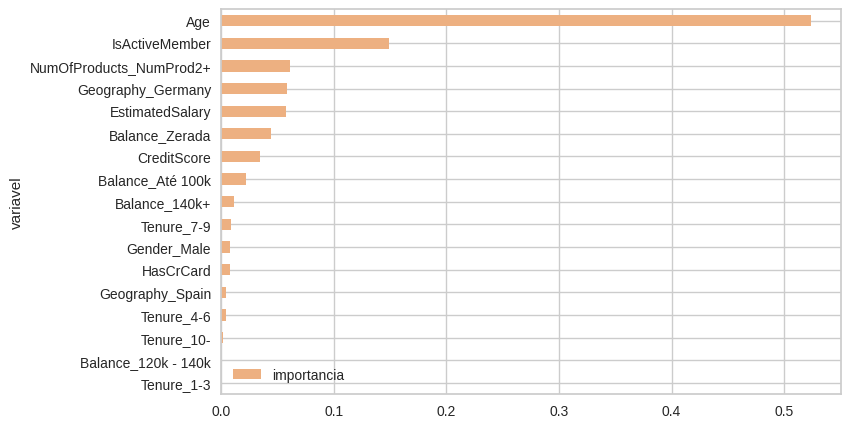

In [45]:
variaveis.sort_values(by = 'importancia', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind = 'barh', figsize = (8, 5), colormap='flare');

### Exportação do Modelo

In [46]:
# Função para exportação do modelo
joblib.dump( lista_de_modelos[3], 'arvore_prof_7_v1.pkl')

['arvore_prof_7_v1.pkl']

In [47]:
# Testando o modelo treinado
funcao_modelo_carregado = joblib.load('arvore_prof_7_v1.pkl')

In [48]:
# Realizando teste de previsão
funcao_modelo_carregado.predict( Xteste.head(20).values )

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# Validando o Teste de previsão
validando_modelo = yteste.head(2500).values == funcao_modelo_carregado.predict( Xteste.head(2500).values )
df = pd.DataFrame(validando_modelo)

df.value_counts(normalize=True)

True     0.838
False    0.162
dtype: float64